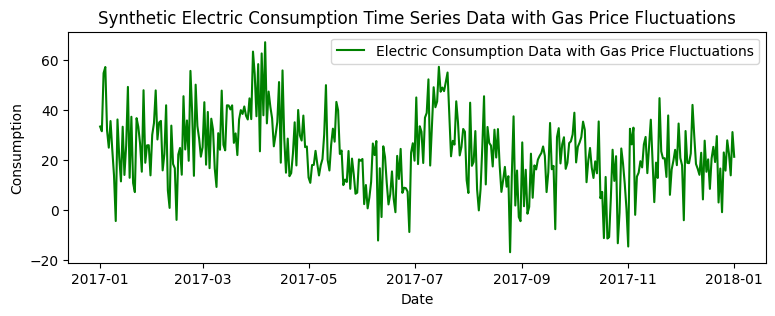

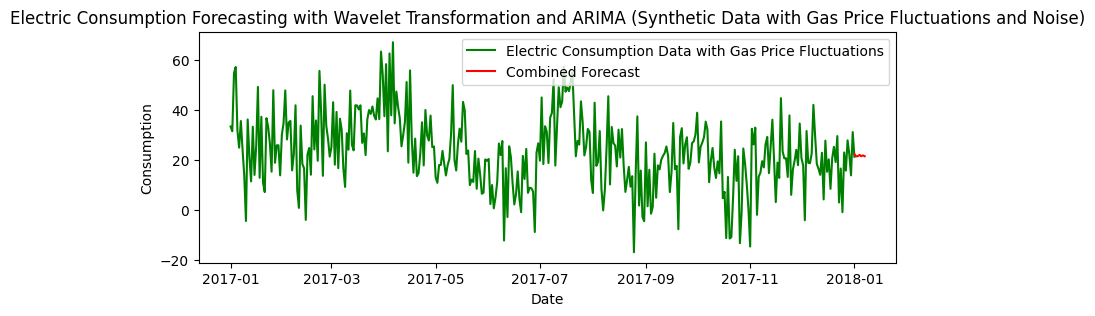

2018-01-01 00:00:00: 22.42
2018-01-02 00:00:00: 21.57
2018-01-03 00:00:00: 21.63
2018-01-04 00:00:00: 22.14
2018-01-05 00:00:00: 21.64
2018-01-06 00:00:00: 21.94
2018-01-07 00:00:00: 21.61


In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.robust import mad
import datetime

# Generate synthetic electric consumption time series data with gas price fluctuations

# Generate a date range from January 2000 to November 2013
date_range = pd.date_range(start="1/1/2017", end="1/1/2018", freq='D')

# Generate random gas prices with fluctuations
mean_price = 40  # You can adjust the mean price
price_volatility = 4  # You can adjust the price volatility
np.random.seed(111)
random_prices = mean_price + \
    np.random.normal(0, price_volatility, len(date_range)).cumsum()

# Ensure prices are non-negative
random_prices[random_prices < 0] = 0.5 * mean_price

# Simulate periodicity with sine waves
t = np.linspace(0, 1, len(date_range))

# Add random noise
noise = np.random.normal(loc=0, scale=10, size=len(date_range))

# Combine gas price fluctuations, periodic component, and noise
electric_consumption_data = pd.DataFrame(
    {'Date': date_range, 'Value': noise + random_prices})

# Visualize the synthetic electric consumption time series with gas price fluctuations
plt.figure(figsize=(9, 3))
plt.plot(electric_consumption_data['Date'], electric_consumption_data['Value'],
         label='Electric Consumption Data with Gas Price Fluctuations', color='green')
plt.title(
    'Synthetic Electric Consumption Time Series Data with Gas Price Fluctuations')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Perform wavelet decomposition, reconstruction, and forecasting with added noise
# Perform wavelet decomposition


def wavelet_decomposition(data, wavelet='db4', level=4):
    """
    Perform wavelet decomposition on the input data.

    Parameters:
    - data: Time series data.
    - wavelet: Wavelet type (default is 'db4').
    - level: Decomposition level (default is 4).

    Returns:
    - Approximation and detail coefficients.
    """
    coeffs = pywt.wavedec(data, wavelet, level=level)
    return coeffs


# Reconstruct the time series from approximation and detail coefficients
def wavelet_reconstruction(coeffs, wavelet='db4'):
    """
    Reconstruct the time series from wavelet coefficients.

    Parameters:
    - coeffs: Approximation and detail coefficients.
    - wavelet: Wavelet type (default is 'db4').

    Returns:
    - Reconstructed time series.
    """
    reconstructed_data = pywt.waverec(coeffs, wavelet)
    return reconstructed_data


def forecast_wavelet_with_noise(data, wavelet='db4', level=4, forecast_steps=10, ci_level=0.95):
    # Perform wavelet decomposition
    coeffs = wavelet_decomposition(data['Value'], wavelet, level)

    # Reconstruct the time series
    reconstructed_data = wavelet_reconstruction(coeffs, wavelet)

    variability = (min(coeffs[0])/2)
    # Forecast future values with added noise
    forecasted_values = []
    for _ in range(forecast_steps):
        # Add variability based on the Median Absolute Deviation (MAD) of the last coefficients

        random_noise = np.random.normal(0, variability)
        # print(random_noise)
        forecasted_values.append(
            reconstructed_data[-1])

    return forecasted_values

# Forecast using ARIMA model


def forecast_arima(data, order=(1, 1, 1), forecast_steps=10):
    model = ARIMA(data['Value'], order=order)
    fit_model = model.fit()
    forecasted_values = fit_model.forecast(steps=forecast_steps)
    return forecasted_values


# Forecast using both wavelet transformation and ARIMA model on synthetic electric consumption data with added noise
forecast_steps = 7

# Wavelet forecast
wavelet_forecast = forecast_wavelet_with_noise(
    electric_consumption_data, wavelet='db4', level=4, forecast_steps=forecast_steps)

# ARIMA forecast
arima_forecast = forecast_arima(
    electric_consumption_data, order=(7, 1, 1), forecast_steps=forecast_steps)

combined_forecast = np.mean([wavelet_forecast, arima_forecast], axis=0)

# Visualize the synthetic electric consumption, wavelet forecast, ARIMA forecast, and combined forecast
plt.figure(figsize=(9, 3))

plt.plot(electric_consumption_data['Date'], electric_consumption_data['Value'],
         label='Electric Consumption Data with Gas Price Fluctuations', color='green')

# plt.plot(pd.date_range(start=electric_consumption_data['Date'].max(
# ), periods=forecast_steps + 1, freq='D')[1:], wavelet_forecast, label='Wavelet Forecast with Noise', color='blue')

# plt.plot(pd.date_range(start=electric_consumption_data['Date'].max(
# ), periods=forecast_steps, freq='D'), arima_forecast, label='ARIMA Forecast', color='orange')

plt.plot(pd.date_range(start=electric_consumption_data['Date'].max(
), periods=forecast_steps, freq='D'), combined_forecast, label='Combined Forecast',  color='red')

plt.title('Electric Consumption Forecasting with Wavelet Transformation and ARIMA (Synthetic Data with Gas Price Fluctuations and Noise)')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Print the forecasted date and value for the combined forecast
start_date = electric_consumption_data['Date'].max()
for i in range(forecast_steps):
    forecast_date = start_date + datetime.timedelta(days=i)
    print(f"{forecast_date}: {combined_forecast[i]:.2f}")


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from pyhht import EMD
from statsmodels.tsa.arima.model import ARIMA


e:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
e:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

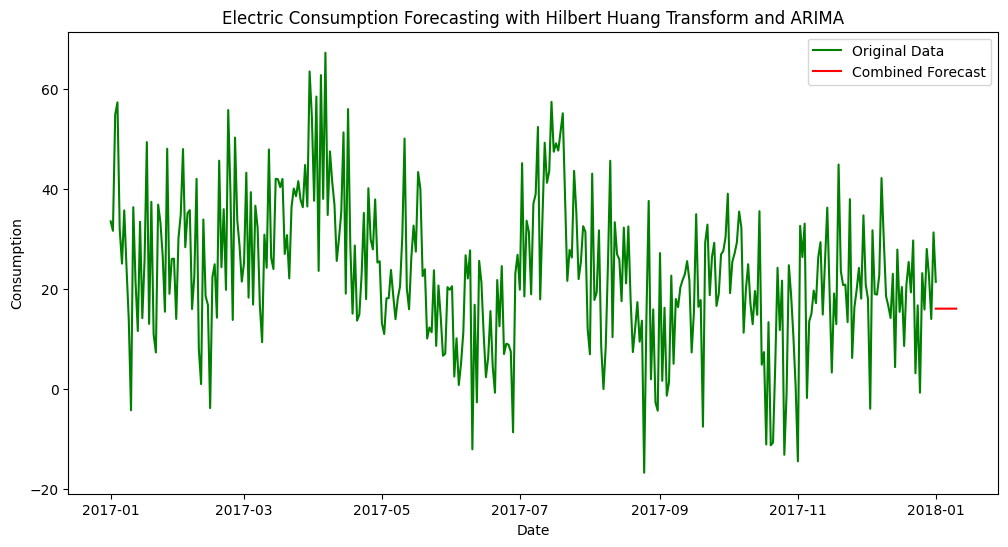

2018-01-01 00:00:00: 16.03
2018-01-02 00:00:00: 16.03
2018-01-03 00:00:00: 16.03
2018-01-04 00:00:00: 16.03
2018-01-05 00:00:00: 16.03
2018-01-06 00:00:00: 16.03
2018-01-07 00:00:00: 16.03
2018-01-08 00:00:00: 16.03
2018-01-09 00:00:00: 16.03
2018-01-10 00:00:00: 16.03


In [44]:
# Function to perform EMD and obtain the Hilbert spectrum
def hht_analysis(data, order=(7, 1, 1), forecast_steps=10):
    # Extract the values from the DataFrame
    signal = data['Value'].values

    # Perform Empirical Mode Decomposition (EMD)
    decomposer = EMD(signal)
    imfs = decomposer.decompose()

    # Plot the IMFs
    num_imfs = imfs.shape[0]
    # plt.figure(figsize=(12, 4 * num_imfs))
    # for i in range(num_imfs):
    #     plt.subplot(num_imfs, 1, i+1)
    #     plt.plot(imfs[i], label=f'IMF {i+1}')
    #     plt.legend()
    #     plt.title(f'IMF {i+1}')
    # plt.tight_layout()
    # plt.show()

    # Perform forecasting for each IMF using ARIMA
    forecasted_values = np.zeros((num_imfs, forecast_steps))
    for i in range(num_imfs):
        model = ARIMA(imfs[i], order=order)
        fit_model = model.fit()
        forecasted_values[i, :] = fit_model.forecast(steps=forecast_steps)

    # Combine the forecasts from all IMFs
    combined_forecast = np.max(forecasted_values, axis=0)

    # Visualize the original data and the combined forecast
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], signal, label='Original Data', color='green')
    plt.plot(pd.date_range(start=data['Date'].max(), periods=forecast_steps,
             freq='D'), combined_forecast, label='Combined Forecast', color='red')
    plt.title(
        'Electric Consumption Forecasting with Hilbert Huang Transform and ARIMA')
    plt.xlabel('Date')
    plt.ylabel('Consumption')
    plt.legend()
    plt.show()

    # Print the forecasted date and value for the combined forecast
    start_date = data['Date'].max()
    for i in range(forecast_steps):
        forecast_date = start_date + datetime.timedelta(days=i)
        print(f"{forecast_date}: {combined_forecast[i]:.2f}")


# Apply the HHT analysis to your electricity consumption data
hht_analysis(electric_consumption_data)


In [45]:
print(arima_forecast)
print(wavelet_forecast)


366    23.456762
367    21.752802
368    21.876739
369    22.882621
370    21.896194
371    22.498757
372    21.834043
Name: predicted_mean, dtype: float64
[21.388135600426985, 21.388135600426985, 21.388135600426985, 21.388135600426985, 21.388135600426985, 21.388135600426985, 21.388135600426985]
